# **Tugas Pagerank dan Implementasi Github**

## **Pagerank**

Pagerank adalah algoritma yang digunakan dalam analisis jaringan dan pengurutan halaman web. Algoritma Pagerank mengukur kepentingan relatif dari setiap halaman web dalam suatu jaringan dengan menganalisis jumlah dan kualitas tautan masuk ke halaman tersebut dari halaman web lain dalam jaringan.



1.   Buat graph berarah dengan networkx(minimal 9 node)
> Langkahnya sebagai berikut :
> *  Import library networkx
> *  Buat struktur grafik kosong. Digraph untuk graph berarah dan Graph untuk graph tidak berarah
> *  Mendeklarasikan node yang saling terhubung sesuai yang dibuat
> *  menampilkan graph beserta nama nodenya masing-masing


In [1]:
import networkx as nx

In [2]:
G=nx.DiGraph() #Fungsi Digraph adalah fungsi untuk membuat graph yang berarah
G.add_edges_from([(1,2),(1,3),(2,4),(4,6),(5,6),(9,8),(8,7),(7,6),(6,1),(2,5),(3,5),(5,8)])

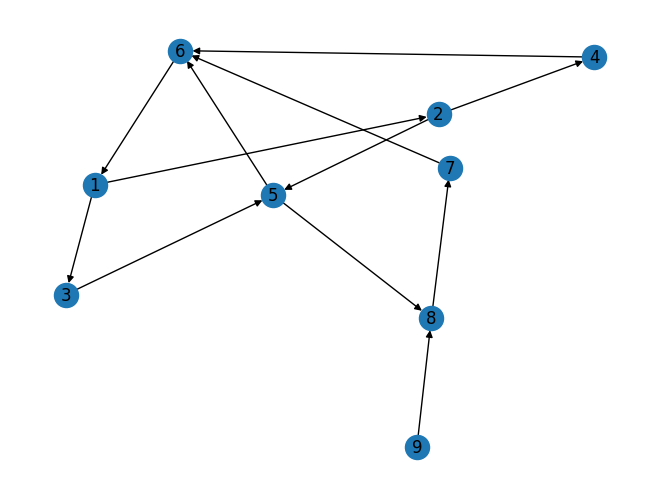

In [3]:
nx.draw(G, with_labels=True)



*   Hitung manual pagerank dari graph yang anda buat



> Rumus pagerank sebagai berikut :
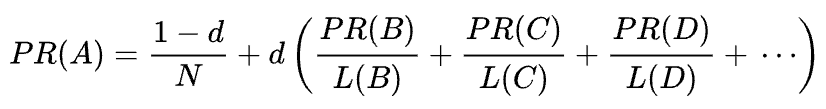

> Ket :
*   d = Faktor lompatan (default untuk networkx adalah 0,85)
*   N = Jumlah banyaknya node
*   PR(B) = Nilai pagerank yang terhubung dalam PR(A)
*   L(B) = jumlah line yang keluar dari PR(B)


> Langkah untuk menentukan pagerank :
1.   Iterasi 0 : inisialisasi semua peringkat menjadi 1/(jumlah node)
2.   Iterasi 1 : melakukan perhitungan sesuai dengan rumus yaitu melakukan perhitungan  **(1-damping factor)/(jumlah banyaknya node)**. kemudian ditambah dengan **damping factor * (jumlahkan setiap nodes PR, dimana PR(B) terhubung dengan nodes PR(A)/jumlah line yang keluar dari nodes PR(B))**
3. Kemudian lakukan perhitungan pada langkah ke 2 pada iterasi selanjutnya.


Perhitungan Manual

In [4]:
d = 0.85 # Damping factor
max_iter = 100
tolerance = 1.0e-6
N = len(G.nodes())
pagerank = dict.fromkeys(G.nodes(), 1.0/N)
for i in range(max_iter):
    diff = 0
    for node in G.nodes():
        rank = 1 - d
        for neighbor in G.neighbors(node):
            rank += d * pagerank[neighbor] / G.degree(neighbor)
        diff += abs(pagerank[node] - rank)
        pagerank[node] = rank
    if diff < N * tolerance:
        break

print("Hasil Perhitungan:\n", pagerank)

Hasil Perhitungan:
 {1: 0.3208032316090249, 2: 0.2924378129525204, 3: 0.20693222359728608, 4: 0.2011899513983847, 6: 0.2408942489558904, 5: 0.26791661155377644, 9: 0.21672658365064976, 8: 0.23550572934431352, 7: 0.20119002790312673}




*   Hitung menggunakan pagerank menggunakan networkx

In [5]:
net = nx.pagerank(G)
net

{1: 0.19267397329797498,
 2: 0.09855381632742174,
 3: 0.09855381632742174,
 4: 0.05855168310095565,
 6: 0.20706909252766145,
 5: 0.1423217159695336,
 9: 0.01666666666666667,
 8: 0.0913205958767592,
 7: 0.09428863990560493}

In [6]:
sorted (net, key=net.get, reverse=True)

[6, 1, 5, 2, 3, 7, 8, 4, 9]

## **Implementasi Github**

2. Implementasikan ulang  https://github.com/Shakunni/Extractive-Text-Summarization/blob/master/extractive_summarizer.ipynb

### Import Library

In [7]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 17.0 MB/s eta 0:00:00


In [8]:
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3977 sha256=c84a493f8f1f372a5e65032896f7d599955ac64778a722f4b5727247ace203c9
  Stored in directory: /root/.cache/pip/wheels/40/75/01/e6c444034338bde9c7947d3467807f889123465c2371e77418
Successfully built docx2txt


In [9]:
# Library numpy membantu bekerja dengan array: pembuatan dan manipulasi array
# Implementasi ini menggunakan array untuk menyimpan matriks yang dihasilkan sebagai array 2-D
# PyPDF2 adalah library yang digunakan untuk membaca file PDF
# docx2txt adalah library yang digunakan untuk membaca dokumen Word
# sys library digunakan untuk mencetak ukuran struktur data yang digunakan dalam program
import numpy as np
import PyPDF2
import docx2txt
import sys

# perpustakaan networkx membantu dalam bekerja dengan grafik ...
# dan kemudian melakukan algoritma PageRank ...
import networkx as nx

# matplotlib adalah library yang digunakan untuk memvisualisasikan data dengan menggambar grafik input matriks
# %matplotlib inline adalah perintah yang digunakan untuk menampilkan grafik di notebook jupyter
import matplotlib.pyplot as plt
%matplotlib inline 

# PunktSentenceTokenizer digunakan untuk melakukan tokenisasi kalimat
from nltk.tokenize.punkt import PunktSentenceTokenizer

# TfidfTransformer, CountVectorizer digunakan untuk menentukan TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

### Berfungsi untuk membaca dokumen dari user

Format yang didukung: .txt, .pdf

Input: Mengambil nama file sebagai input.

Keluaran: Mengembalikan keluaran string yang berisi konten file.

In [10]:
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

### Berfungsi untuk membuat token pada dokumen

Input: String dokumen teks

Keluaran: Daftar yang berisi kalimat sebagai elemennya

In [11]:
def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

### Baca dokumen

In [13]:
# reading a file and 
# printing the size of the file
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

Please input a file name: /content/drive/MyDrive/prosain/tugas/story1.txt
You have asked for the document /content/drive/MyDrive/prosain/tugas/story1.txt
1
<class 'str'>
The length of the file is: 7127


### Hasil daftar kalimat dalam dokumen

In [14]:
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 864
The size of the item 0 in Bytes is: 147


In [15]:
print(type(sentences_list))

<class 'list'>


In [16]:
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 101


In [17]:
for i in sentences_list:
    print(i)

 In Banaras District there is a village called Bira in which an old, childless
widow used to live.
She was a Gond woman named Bhungi and she didn't
own either a scrap of land or a house to live in.
Her only source of livelihood
was a parching oven.
The village folk customarily have one meal a day of
parched grains, so there was always a crowd around Bhungi's oven.
Whatever grain she was paid for parching she would grind or fry and eat it.
She slept in a corner of the same little shack that sheltered the oven.
As soon
as it was light she'd get up and go out to gather dry leaves from all around to
make her fire.
She would stack the leaves right next to the oven, and after
twelve, light the fire.
But on the days when she had to parch grain for Pandit
Udaybhan Pandey, the owner of the village, she went to bed hungry.
She
was obliged to work without pay for Pandit Udaybhan Pandey She also had
to fetch water for his house.
And, for this reason, from time to time the oven
was not lit.
She liv

### Menghasilkan term-document matrix (TD matrix) dari data

In [18]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [19]:
cv_demo = CountVectorizer()
text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'
print('Feature list: {}'.format(cv_demo.get_feature_names_out()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0]]
Feature list: ['am' 'are' 'ashish' 'bad' 'good' 'is' 'not' 'you']


In [20]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names_out())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse._csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <101x492 sparse matrix of type '<class 'numpy.int64'>'
	with 1223 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 48
['able' 'accept' 'acted' 'afraid' 'after' 'again' 'against' 'alarmed'
 'alas' 'all' 'already' 'also' 'always' 'am' 'amid' 'amidst' 'an' 'and'
 'anger' 'another' 'any' 'anybody' 'are' 'around' 'arrived' 'as' 'ashes'
 'asked' 'at' 'attendants' 'attention' 'authority' 'available' 'away'
 'balls' 'banaras' 'band' 'barn' 'basket' 'baskets' 'be' 'because' 'bed'
 'been' 'before' 'began' 'being' 'belly' 'bewildered' 'bhungi' 'bira'
 'blaze' 'body' 'bold' 'breaking' 'breath' 'broke' 'build' 'building'
 'built' 'but' 'by' 'called' 'came' 'can' 'carrying' 'cereal' 'childless'
 'chores' 'clay' 'clustering' 'collapsed' 'collect' 'coming' 'command'
 'completely' 'conflagration' 'considered' 'consumed' 'cooked' 'corner'
 'could' 'courage' '

In [21]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.24450772 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [22]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T

<bound method _cs_matrix.toarray of <492x101 sparse matrix of type '<class 'numpy.float64'>'
	with 1223 stored elements in Compressed Sparse Column format>>


Number of edges 3319
Number of vertices 101


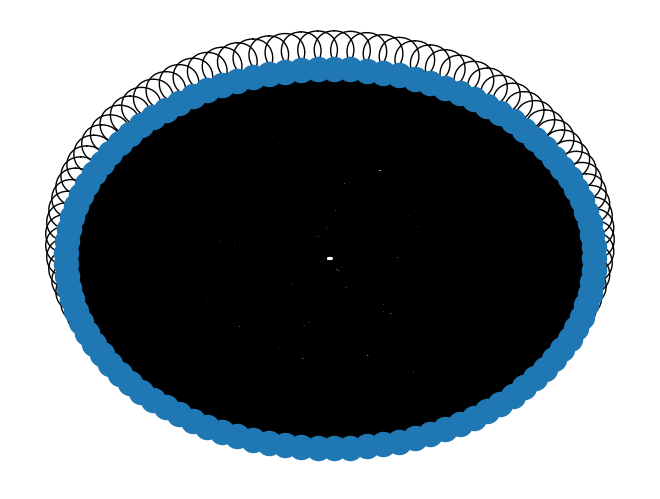

The memory used by the graph in Bytes is: 48


In [23]:
nx_graph = nx.from_scipy_sparse_array(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

### Mendapatkan peringkat setiap kalimat menggunakan textrank

In [24]:
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 4696
0 0.008473050396994235
1 0.011136728928068603
2 0.009383758113199747
3 0.010305311473077004
4 0.011387878003998006
5 0.011453806553948459
6 0.011956616615231173
7 0.013007582297781907
8 0.01646287839865644
9 0.011870375394732305
10 0.012805637163062402
11 0.012625721662310345
12 0.010081809427917856
13 0.012615817098175835
14 0.009951004198363802
15 0.012312866898217463
16 0.00905563154351586
17 0.007114339155021146
18 0.0067471140170273294
19 0.01107854731351773
20 0.010166769608001893
21 0.012780859072392963
22 0.012641302785309182
23 0.009348558444248853
24 0.010022831759849004
25 0.013720926664709483
26 0.00967523353291061
27 0.013901992235429548
28 0.009475796944343159
29 0.008121737705990758
30 0.010128784557098498
31 0.010061180193377258
32 0.007628895359126891
33 0.008648669935446914
34 0.009607446148227936
35 0.008321167851894651
36 0.005865449854506728
37 0.010850655936218322
38 0.01016989679015465
39 0.01131627

### Menemukan kalimat-kalimat penting dan membuat ringkasan

In [25]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [26]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])
print(rank_max)
print(rank_min)

0.01646287839865644
0.005429708840559132


In [27]:
temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

101


In [28]:
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [29]:
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [30]:
model = sentence_list

### Menulis ringkasan ke file baru

In [31]:
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close

But on the days when she had to parch grain for Pandit
Udaybhan Pandey, the owner of the village, she went to bed hungry. People went to Panditji and asked him to
give the order for the old woman's oven to be rebuilt and the fire once more
lighted, but he paid no attention to them. 'If you’re going to stay in the village you'll have to do my chores. He kicked at the trough again but she ran in front of it
and took the kick in her side. She had to
keep stopping from the parching in order to keep the oven fire going. Bhungi was energetically rebuilding it with balls of clay Most
likely she'd spent the night at this work and wanted to finish it before the sun
was high. With this command the servants went away and Bhungi began to parch the
grain. Here she had
known the sorrows and pleasures of life; she could not give it up now in the
last days. ‘To his attendants he said, 'Go get a pile of leaves right
away and set fire to the whole thing; we'll show her how to make an oven. By now the
wh

<function TextIOWrapper.close()>

In [32]:
for lines in sentence_list:
    print(lines)

But on the days when she had to parch grain for Pandit
Udaybhan Pandey, the owner of the village, she went to bed hungry.
People went to Panditji and asked him to
give the order for the old woman's oven to be rebuilt and the fire once more
lighted, but he paid no attention to them.
'If you’re going to stay in the village you'll have to do my chores.
He kicked at the trough again but she ran in front of it
and took the kick in her side.
She had to
keep stopping from the parching in order to keep the oven fire going.
Bhungi was energetically rebuilding it with balls of clay Most
likely she'd spent the night at this work and wanted to finish it before the sun
was high.
With this command the servants went away and Bhungi began to parch the
grain.
Here she had
known the sorrows and pleasures of life; she could not give it up now in the
last days.
‘To his attendants he said, 'Go get a pile of leaves right
away and set fire to the whole thing; we'll show her how to make an oven.
By now the
wh